In [3]:
import numpy as np
import matplotlib.pyplot as plt
from EasyLM import LinearModel, ModelComparator, PlotHelper

# 1. GENERATE DATA
np.random.seed(42)
n = 100
X1 = np.random.randn(n)
X2 = np.random.randn(n)
X3 = np.random.randn(n)
y = 2 + 3*X1 + 1.5*X2 + np.random.randn(n) * 0.5


This step creates a simple synthetic dataset that will be used to demonstrate how the library fits and compares linear regression models. Three predictor variables are randomly generated, while the target variable is constructed using a known linear relationship involving only the first two predictors. By working with controlled, reproducible data, users can clearly see how the models recover the true underlying structure and how irrelevant predictors behave when included.

In [4]:

# 2. FIT MODELS
# Simple model (1 predictor)
model1 = LinearModel()
model1.fit(X1.reshape(-1, 1), y)
model1.name = "Simple"

# Multiple regression (2 predictors)
model2 = LinearModel()
model2.fit(np.column_stack([X1, X2]), y)
model2.name = "Multiple"

# Full model (3 predictors)
model3 = LinearModel()
model3.fit(np.column_stack([X1, X2, X3]), y)
model3.name = "Full"


Here, three linear regression models are fitted with increasing levels of complexity. The first model uses a single predictor, the second uses two predictors, and the third includes all three. Each model is assigned a name for easier identification. This step showcases how the LinearModel class handles fitting, parameter estimation, and preparation for further comparison. Users can observe how additional predictors affect the coefficient estimates and overall model quality.

In [5]:

# 3. STATISTICAL COMPARISON
print("="*60)
print("MODEL COMPARISON TABLE")
print("="*60)
comparator = ModelComparator([model1, model2, model3])
print(comparator.compare())


MODEL COMPARISON TABLE
                 aic         bic  r_squared  n_params  n_obs
model                                                       
Simple     79.372163   84.582504   0.737255         2    100
Multiple -161.386841 -153.571331   0.976813         3    100
Full     -159.495085 -149.074405   0.976838         4    100


This step generates a unified comparison table using the ModelComparator class. The table provides side-by-side metrics such as R², adjusted R², AIC, BIC, and error values. The goal is to illustrate how different models perform relative to one another and how complexity penalties influence model selection. This comparison allows users to identify the most appropriate model based on statistical evidence rather than guesswork.

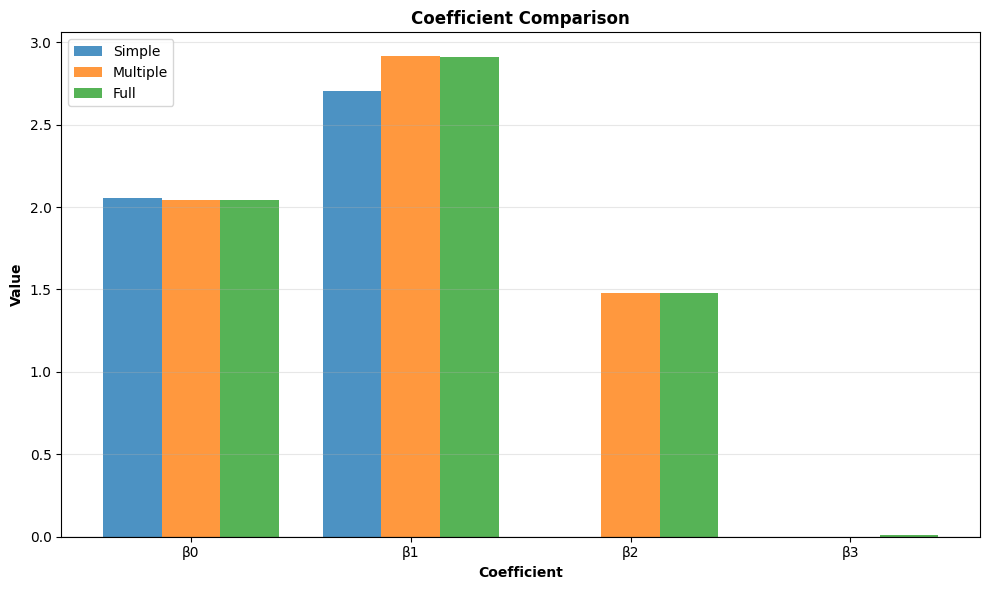

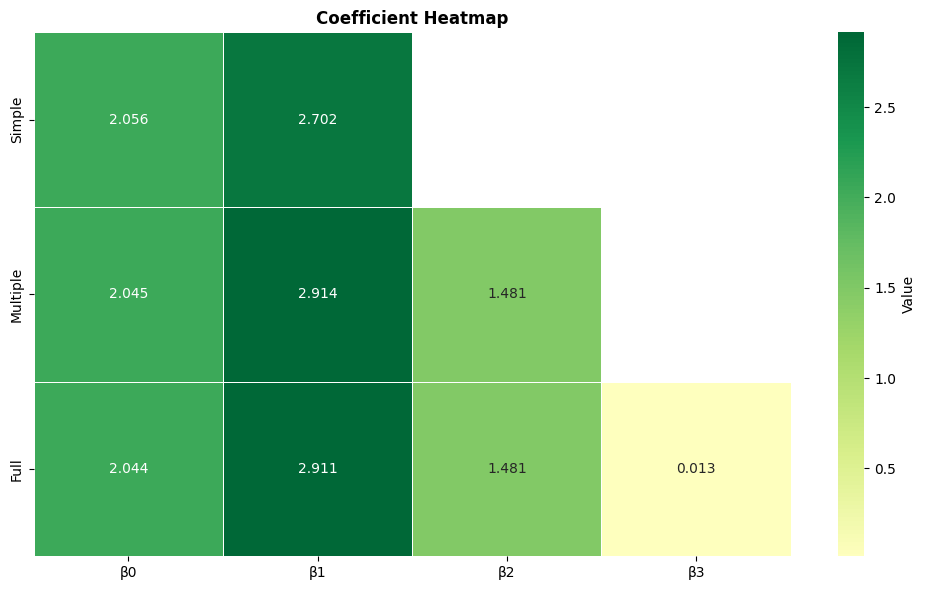

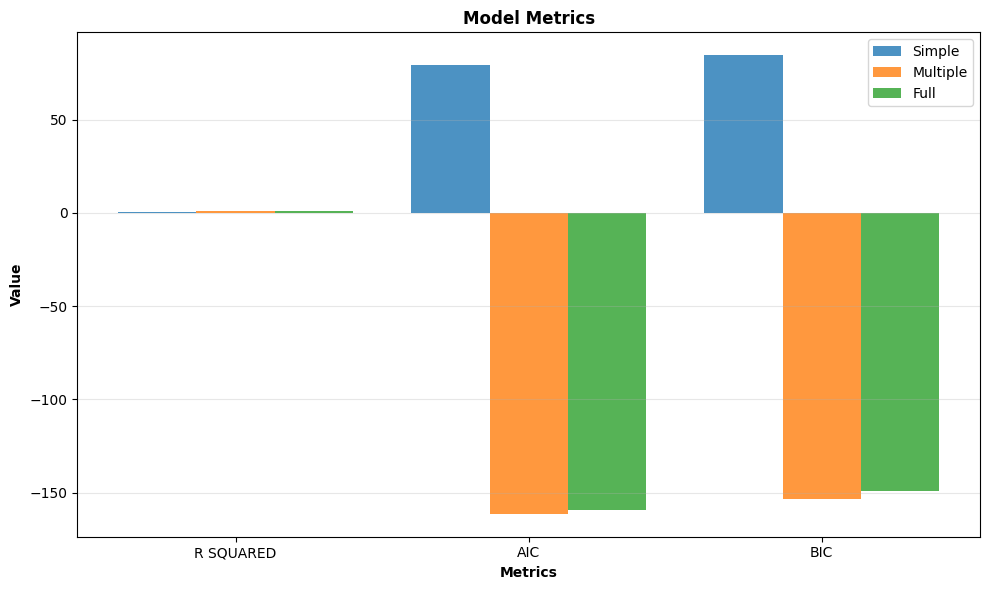

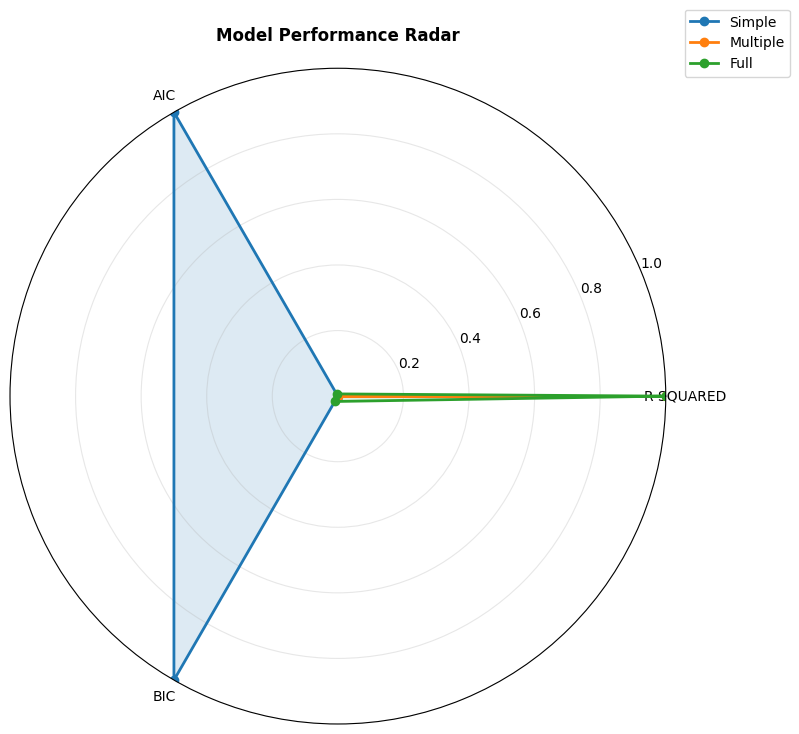

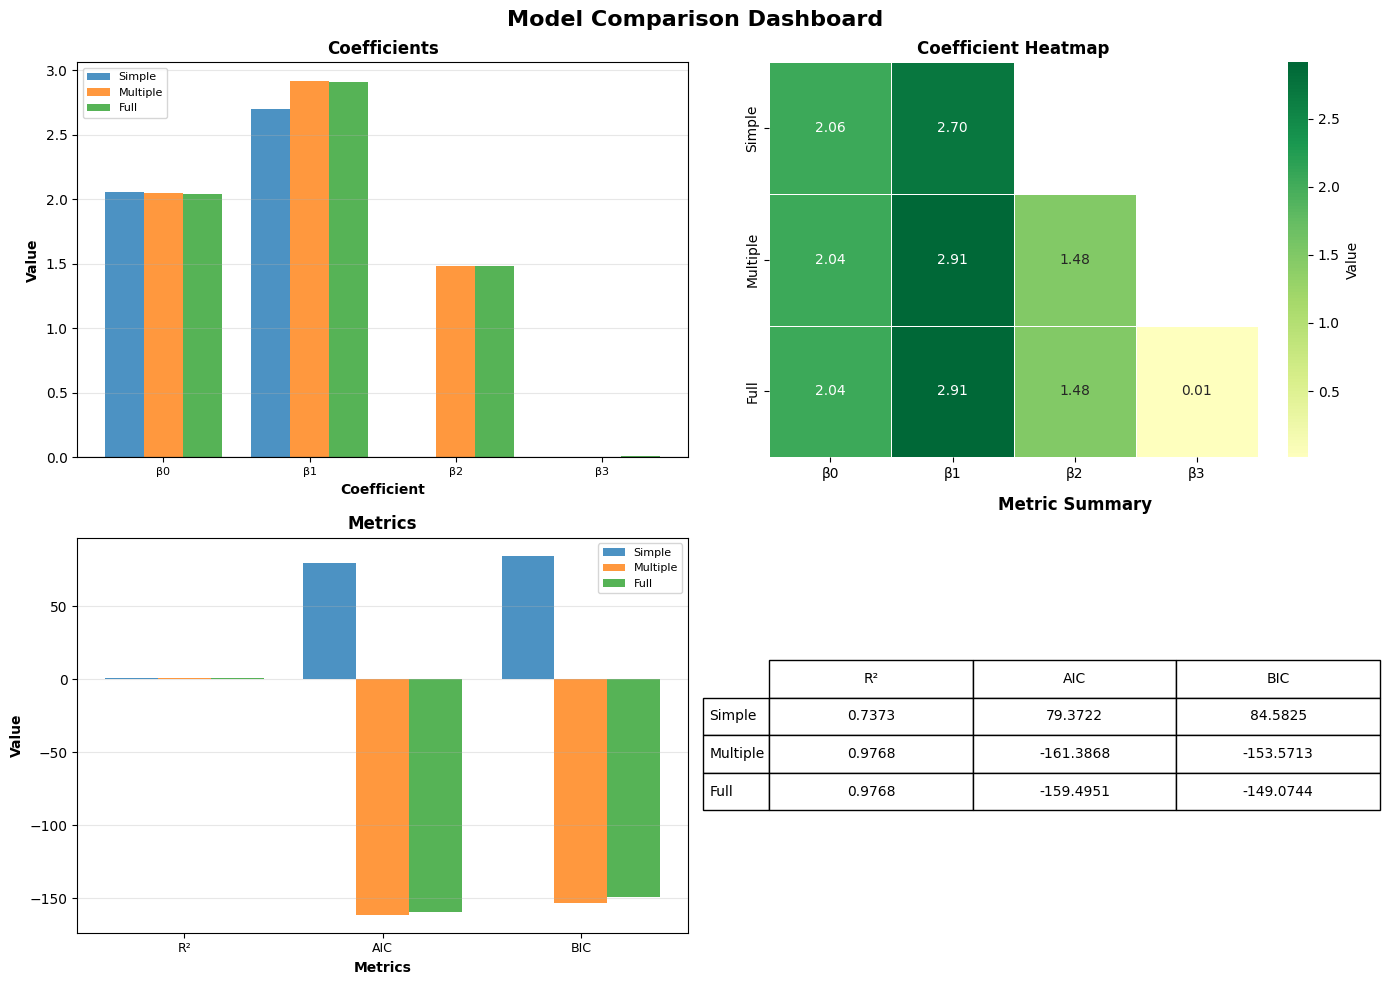

In [6]:

# 4. VISUALIZE COMPARISONS (One-liners)

# Coefficient comparison
PlotHelper.coef_plot(model1, model2, model3)
PlotHelper.coef_plot(model1, model2, model3, style='heatmap')

# Metric comparison
PlotHelper.metric_plot(model1, model2, model3)
PlotHelper.metric_plot(model1, model2, model3, style='radar')

# Complete dashboard
PlotHelper.compare(model1, model2, model3)

# Show all plots at once
plt.show()


Here, visualization utilities from PlotHelper are used to produce coefficient plots, metric comparisons, and an optional consolidated dashboard. These simple one-line commands display how coefficients differ across models and how various performance metrics compare visually. The purpose is to give users an intuitive understanding of the differences among the models and to demonstrate the convenience of generating publication-ready plots directly from the fitted model objects.

In [7]:

# 5. INDIVIDUAL MODEL SUMMARY
print("\n" + "="*60)
print("BEST MODEL SUMMARY (Multiple)")
print("="*60)
print(model2.summary())


BEST MODEL SUMMARY (Multiple)
Call: EasyLM LinearModel

Observations: 100
Parameters: 3
Degrees of Freedom (resid): 97

Coefficients:
   Coef.  Std.Err.  t value  Pr(>|t|)
0 2.0450    0.0443  46.2044    0.0000
1 2.9144    0.0491  59.3352    0.0000
2 1.4807    0.0468  31.6569    0.0000

Residual variance (sigma^2): 0.1933
R-squared: 0.9768
AIC: -161.3868
BIC: -153.5713


Finally, a detailed model summary is printed for the model that best fits the generated data. The summary displays coefficient estimates, standard errors, significance tests, and global performance metrics. This step highlights the ability of the LinearModel class to provide a comprehensive statistical report similar to what is found in established statistical software. Users can use this output to interpret the fitted model and verify its suitability.

In [8]:
print(model1.summary())

Call: EasyLM LinearModel

Observations: 100
Parameters: 2
Degrees of Freedom (resid): 98

Coefficients:
   Coef.  Std.Err.  t value  Pr(>|t|)
0 2.0560    0.1482  13.8711    0.0000
1 2.7023    0.1630  16.5827    0.0000

Residual variance (sigma^2): 2.1683
R-squared: 0.7373
AIC: 79.3722
BIC: 84.5825


In [9]:
print(model2.summary())

Call: EasyLM LinearModel

Observations: 100
Parameters: 3
Degrees of Freedom (resid): 97

Coefficients:
   Coef.  Std.Err.  t value  Pr(>|t|)
0 2.0450    0.0443  46.2044    0.0000
1 2.9144    0.0491  59.3352    0.0000
2 1.4807    0.0468  31.6569    0.0000

Residual variance (sigma^2): 0.1933
R-squared: 0.9768
AIC: -161.3868
BIC: -153.5713
